In [ ]:
#import sklearn
#sklearn.__version__

In [ ]:
#!pip install --upgrade scikit-learn

In [ ]:
#import sklearn
#sklearn.__version__

# **PreProcessing of Data**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")
df.head()

<ipython-input-8-18ab1675e41e>:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# **Data Checking**

In [ ]:
import numpy as np
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df['quantity tons']=df['quantity tons'].apply(lambda x: np.nan if str(x).isalpha() else x)
df.isnull().sum()

id                   2
item_date            1
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [ ]:
df['item_date'] = pd.to_datetime(df['item_date'],format='%Y%m%d',errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'],format='%Y%m%d',errors='coerce')
df['quantity tons'] = df['quantity tons'].astype(float)
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if str(x).startswith('00000') else x)
df.isnull().sum()

id                    2
item_date             3
quantity tons         1
customer              1
country              28
status                2
item type             0
application          24
thickness             1
width                 0
material_ref     100645
product_ref           0
delivery date         3
selling_price         1
dtype: int64

In [ ]:
#since material has 55.39% of null values filling it would result in overfitting of our model so lets remove it
df.drop(['id','material_ref'],axis=1,inplace=True)

In [ ]:
#to remove negative values from numeric columns
for i in ['quantity tons','thickness','width','selling_price']:
  df = df[df[i] > 0] #to remove negative values

In [ ]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [ ]:
df['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [ ]:
df.dropna(inplace=True)

df['customer'] = df['customer'].astype('int64')
df['application'] = df['application'].astype('int64')
df['country'] = df['country'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181622 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181622 non-null  datetime64[ns]
 1   quantity tons  181622 non-null  float64       
 2   customer       181622 non-null  int64         
 3   country        181622 non-null  int64         
 4   status         181622 non-null  object        
 5   item type      181622 non-null  object        
 6   application    181622 non-null  int64         
 7   thickness      181622 non-null  float64       
 8   width          181622 non-null  float64       
 9   product_ref    181622 non-null  int64         
 10  delivery date  181622 non-null  datetime64[ns]
 11  selling_price  181622 non-null  float64       
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 18.0+ MB


In [ ]:
print(df.isnull().sum())
df.shape

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64


(181622, 12)

In [ ]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308,28,Won,W,10,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.024839,30202938,25,Won,W,41,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.127949,30153963,30,Won,WI,28,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.411065,30349574,32,Won,S,59,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.526262,30211560,28,Won,W,10,4.00,2000.0,640665,2021-03-01,577.00


# **Remove Skewness**

In [ ]:
v = df.copy()

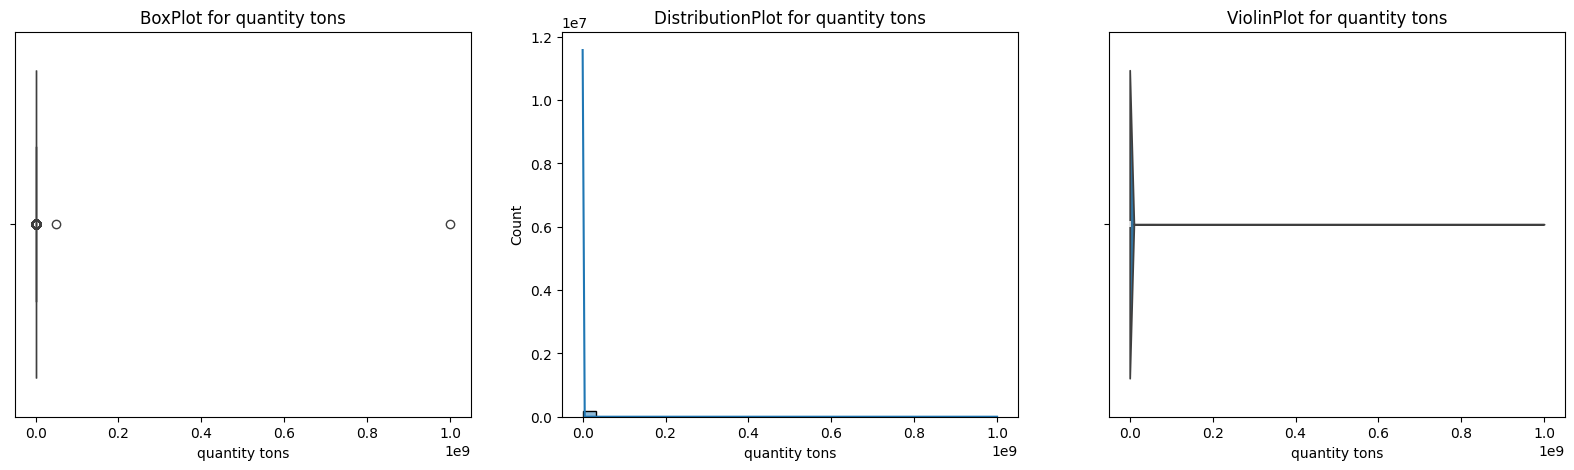

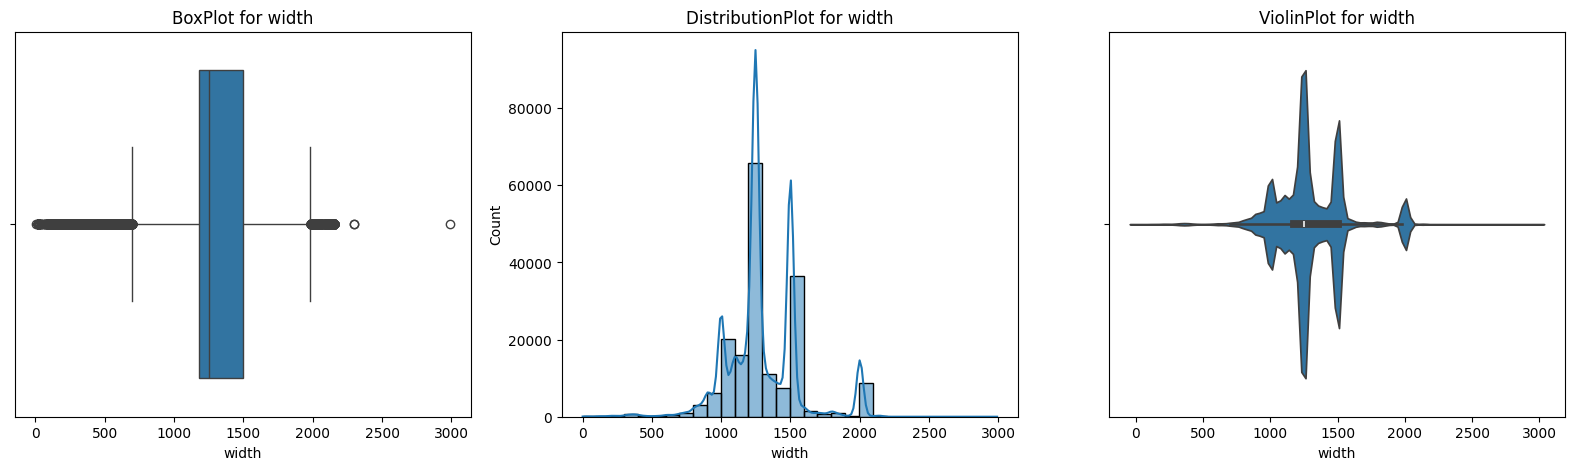

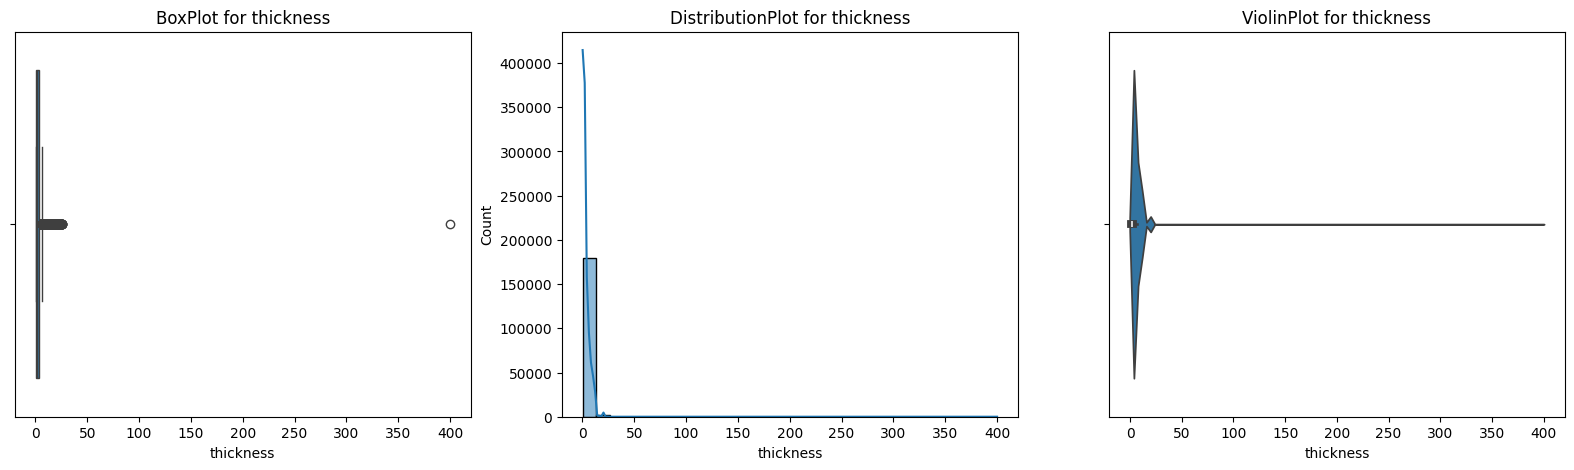

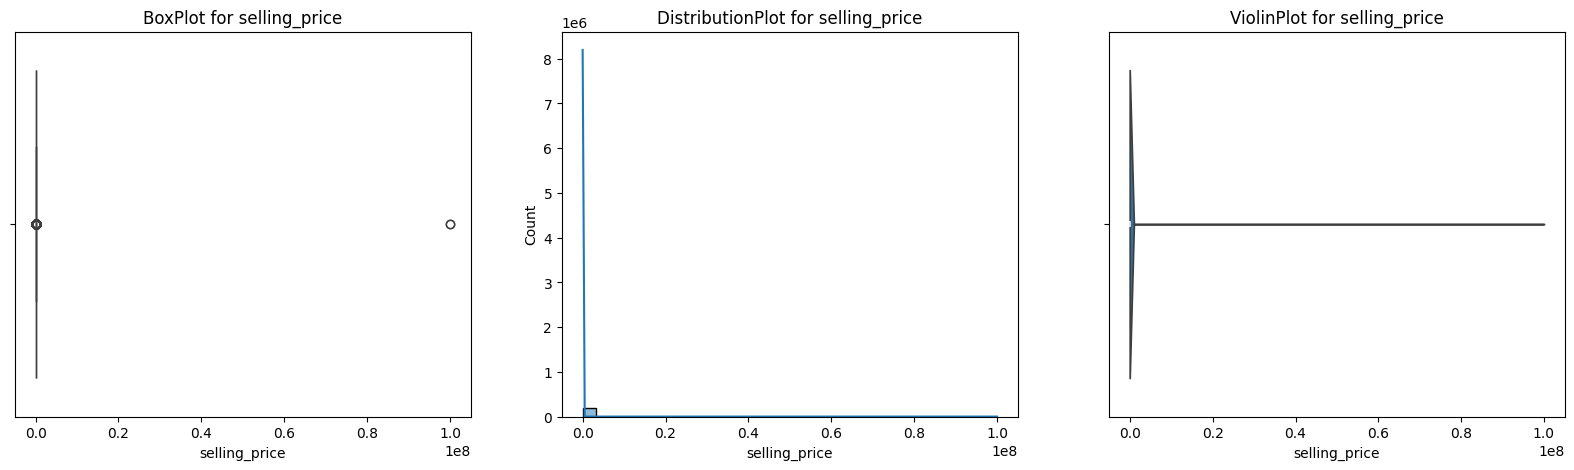

In [ ]:
# visualizing skewness and outliers
import matplotlib.pyplot as plt
import seaborn as sns

def check_plot(df,column):
  plt.figure(figsize=(20,5))

  plt.subplot(1,3,1)
  sns.boxplot(data = df,x=column)
  plt.title(f"BoxPlot for {column}")

  plt.subplot(1,3,2)
  sns.histplot(data=df,x=column,kde=True,bins=30)
  plt.title(f"DistributionPlot for {column}")

  plt.subplot(1,3,3)
  sns.violinplot(data=df,x=column)
  plt.title(f"ViolinPlot for {column}")

  plt.show()

for col in ['quantity tons', 'width', 'thickness', 'selling_price']:
  check_plot(v,col)

In [ ]:
from scipy.stats import skew

print("Thickness :", skew(v['thickness']))
print("Quantity :", skew(v['quantity tons']))
print("selling_price :", skew(v['selling_price']))
print("Width :", skew(v['width']))

Thickness : 15.302832491963118
Quantity : 424.62769478146345
selling_price : 301.3432925448491
Width : 0.3748219888993155


In [ ]:
def remove_skewness(df,column):
  df[column] = np.log(df[column])


for i in ['thickness','quantity tons','selling_price']:
  remove_skewness(v,i)
  #check_plot(v,i)

In [ ]:
from scipy.stats import skew

print("Thickness :", skew(v['thickness']))
print("Quantity :", skew(v['quantity tons']))
print("selling_price :", skew(v['selling_price']))

Thickness : 0.3491232104242874
Quantity : -0.06876190881973908
selling_price : -5.342742555568181


In [ ]:
v.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,3.991779,30156308,28,Won,W,10,0.693147,1500.0,1670798778,2021-07-01,6.749931
1,2021-04-01,6.643822,30202938,25,Won,W,41,-0.223144,1210.0,1668701718,2021-04-01,6.953684
2,2021-04-01,5.956169,30153963,30,Won,WI,28,-0.967584,952.0,628377,2021-01-01,6.468211
3,2021-04-01,5.310301,30349574,32,Won,S,59,0.832909,1317.0,1668701718,2021-01-01,6.643790
4,2021-04-01,6.666354,30211560,28,Won,W,10,1.386294,2000.0,640665,2021-03-01,6.357842


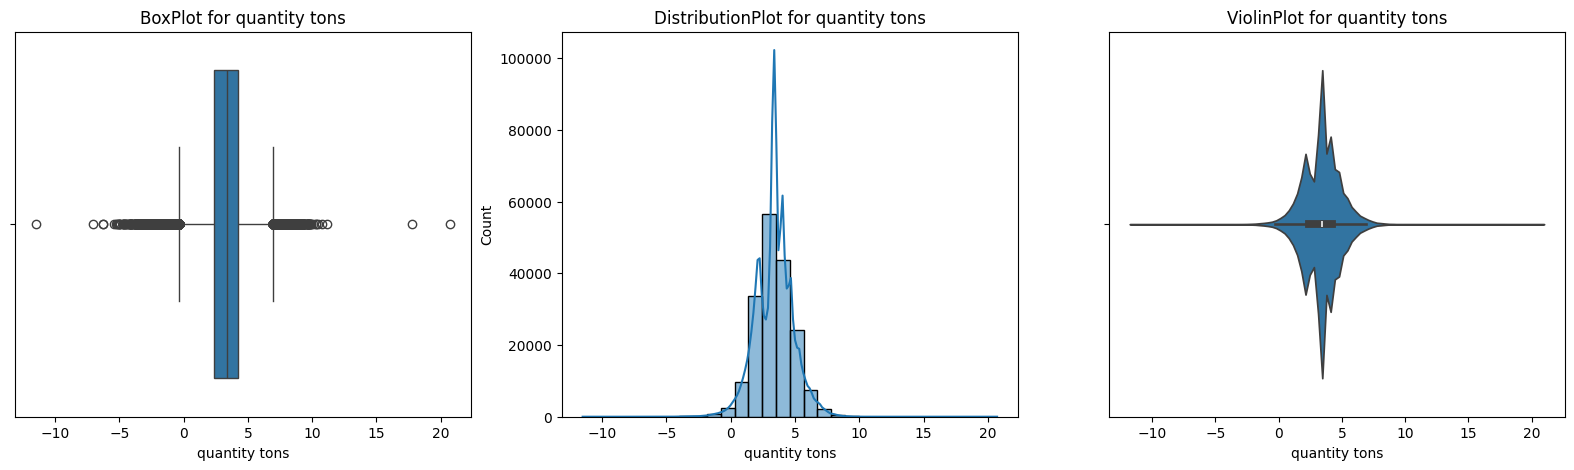

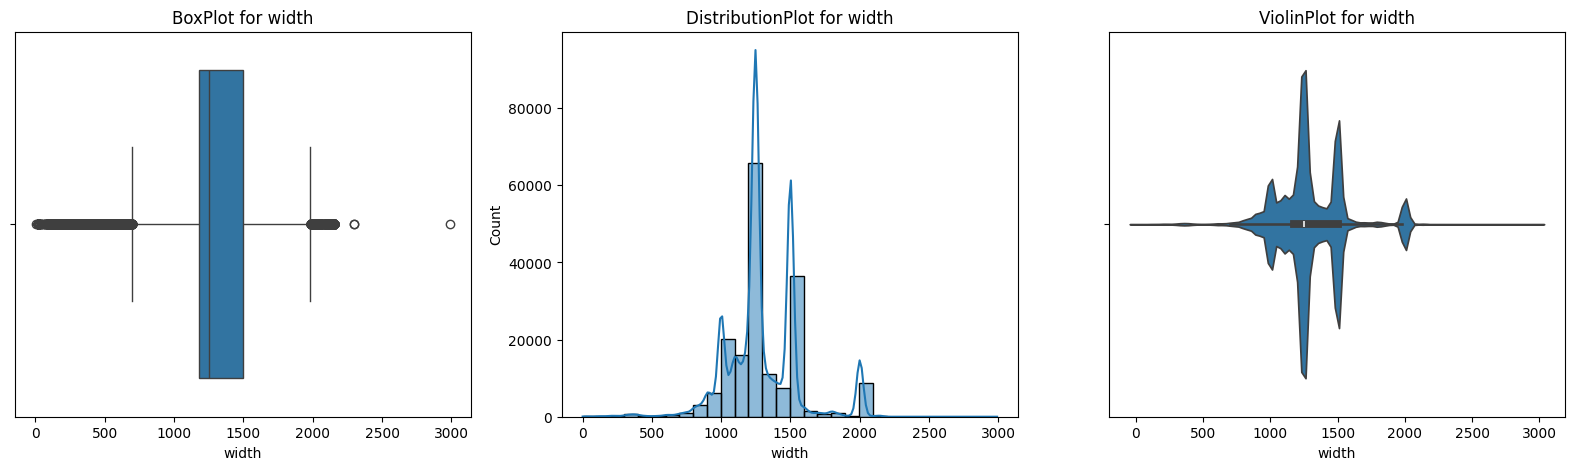

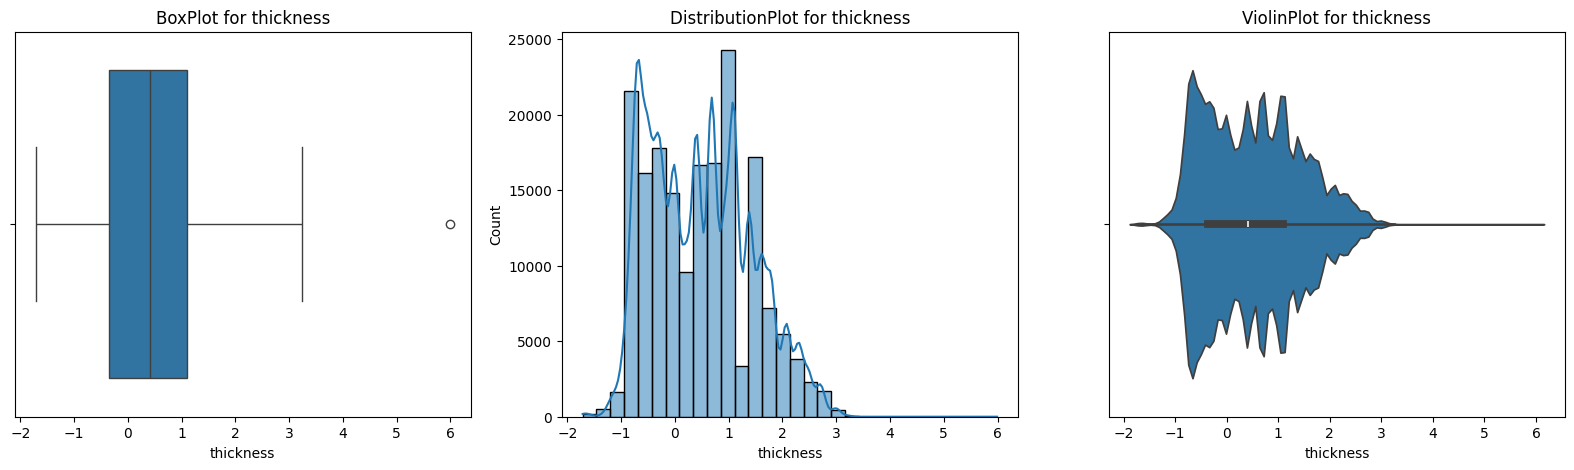

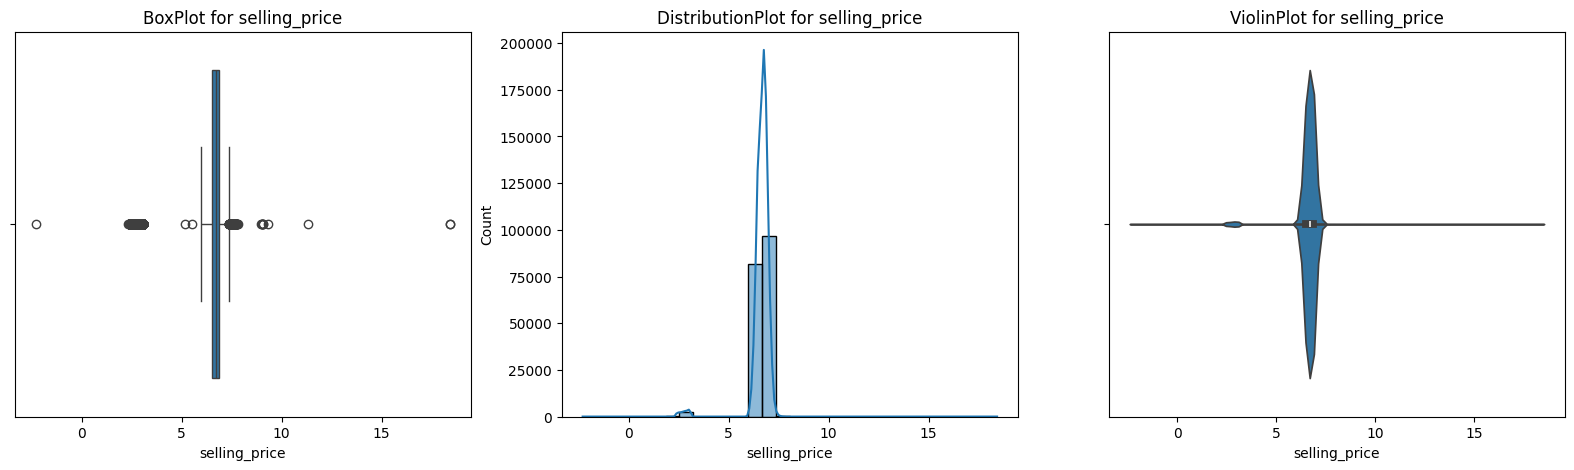

In [ ]:
for col in ['quantity tons', 'width', 'thickness', 'selling_price']:
  check_plot(v,col)

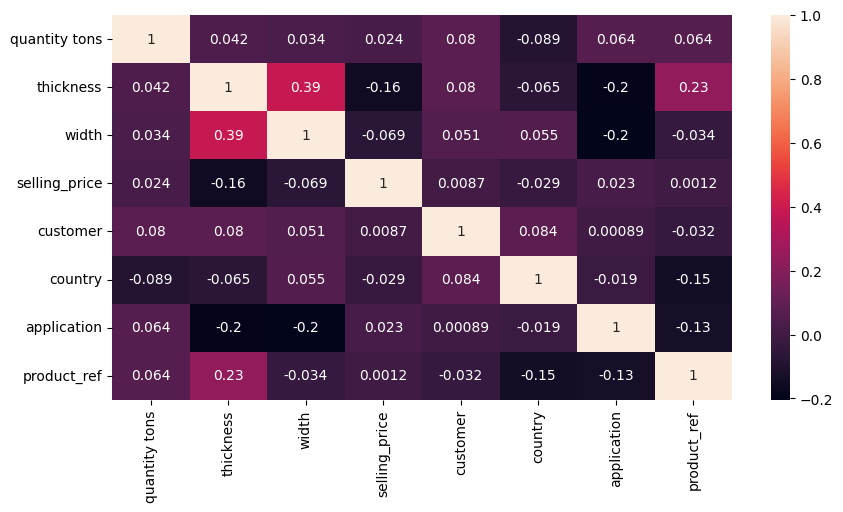

In [ ]:
#lets check correlation
def show_heatmap(a):

  plt.figure(figsize=(10,5))
  sns.heatmap(a.corr(),annot=True)
  plt.show()

a = v[['quantity tons','thickness','width','selling_price','customer','country','application','product_ref']]
show_heatmap(a)

# **Standardization & Model Selection & Evaluation**

In [ ]:
df1 = v.copy()

In [ ]:
X = df1.drop(['selling_price','item_date','delivery date'],axis=1)
y = df1['selling_price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

s_ohe = OneHotEncoder(handle_unknown='ignore')
it_ohe = OneHotEncoder(handle_unknown='ignore')


status = s_ohe.fit_transform(X[['status']]).toarray()
s_column = s_ohe.get_feature_names_out(['status'])

item = it_ohe.fit_transform(X[['item type']]).toarray()
it_column = it_ohe.get_feature_names_out(['item type'])
original_column = ['quantity tons', 'customer', 'country','application', 'thickness', 'width', 'product_ref']
all_column = original_column + list(s_column) + list(it_column)

X_combined = np.concatenate((X[['quantity tons', 'customer', 'country','application', 'thickness', 'width', 'product_ref']].values,status,item),axis=1)
X = pd.DataFrame(X_combined,columns=all_column)

scaler = MinMaxScaler()
X[['quantity tons','thickness','width']] = scaler.fit_transform(X[['quantity tons','thickness','width']])
X.head()

,quantity tons,customer,country,application,thickness,width,product_ref,status_Draft,status_Lost,status_Not lost for AM,...,status_To be approved,status_Won,status_Wonderful,item type_IPL,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,0.480972,30156308.0,28.0,10.0,0.312466,0.501506,1.670799e+09,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.563241,30202938.0,25.0,41.0,0.193564,0.404483,1.668702e+09,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.541909,30153963.0,30.0,28.0,0.096962,0.318167,6.283770e+05,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.521874,30349574.0,32.0,59.0,0.330602,0.440281,1.668702e+09,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.563940,30211560.0,28.0,10.0,0.402412,0.668786,6.406650e+05,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
  model.fit(X_train,y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  print(f"------------------{type(model).__name__}------------------")
  print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
  print("Train R2:",r2_score(y_train,train_pred))
  print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
  print("Test R2:",r2_score(y_test,test_pred))

------------------DecisionTreeRegressor------------------
Train RMSE: 0.0008433264319138981
Train R2: 0.9999977577447389
Test RMSE: 0.20690242673770662
Test R2: 0.8670801607694614


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------RandomForestRegressor------------------
Train RMSE: 0.056658749267603344
Train R2: 0.9898789028508698
Test RMSE: 0.14574491069020834
Test R2: 0.9340453476932453


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#model = RandomForestRegressor(oob_score=True,n_estimators=300,min_samples_split=10,min_samples_leaf=2,max_features=None,max_depth=40)
model =  RandomForestRegressor(n_jobs= -1, n_estimators= 500, min_samples_split =9, min_samples_leaf= 1, max_features= None, max_depth= 80, criterion= 'friedman_mse')


model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"------------------{type(model).__name__}------------------")
print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
print("Train R2:",r2_score(y_train,train_pred))
print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
print("Test R2:",r2_score(y_test,test_pred))

------------------RandomForestRegressor------------------
Train RMSE: 0.09201564321609697
Train R2: 0.9733057969552101
Test RMSE: 0.14128356939304737
Test R2: 0.9380213724335866


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# **Testing Model**

In [ ]:
import pickle
with open(r"/content/p_model.pkl","rb") as f:
  model = pickle.load(f)

UnpicklingError: invalid load key, '\x00'.

In [ ]:
#new_sample = pd.DataFrame([[np.log(100),30211560,28, 10, np.log(26), np.log(35),1670798778,'Won','PL']],columns=['quantity tons', 'customer', 'country', 'application', 'thickness','width', 'product_ref','status','item type'])

new_sample = pd.DataFrame([[np.log(400),30211560,28, 10, np.log(265), np.log(185),1670798778,'Won','PL']],columns=['quantity tons', 'customer', 'country', 'application', 'thickness','width', 'product_ref','status','item type'])
s_trans = s_ohe.transform(new_sample[['status']]).toarray()
it_trans = it_ohe.transform(new_sample[['item type']]).toarray()

#new_sample[['quantity tons','thickness','width']] = scaler.fit_transform(new_sample[['quantity tons','thickness','width']])
new_sample.drop(['status','item type'],axis=1,inplace=True)
new_sample1 = np.concatenate((new_sample.values,s_trans,it_trans),axis=1)

predicted_scaled = model.predict(new_sample1)
#predicted_original = scaler.inverse_transform(predicted_scaled)
print('Predicted selling price:', np.exp(predicted_scaled))

# **Save Model**

In [ ]:
import pickle

with open('Regression_model.pkl','wb') as f:
  pickle.dump(model,f)

with open('Regression_scaler.pkl','wb') as f:
  pickle.dump(scaler,f)

with open('Rs_ohe.pkl','wb') as f:
  pickle.dump(s_ohe,f)

with open('Rit_ohe.pkl','wb') as f:
  pickle.dump(it_ohe,f)

In [ ]:
import pickle

with open('Regression_model.pkl','wb') as f:
  pickle.dump(model,f)

In [ ]:
c = model.predict(X_test)
np.exp(c)

array([ 862.39205638,  998.80673923,  932.30955857, ..., 1157.58917522,
        472.51628097,  533.86598606])

In [ ]:
import pickle

In [ ]:
with open('/content/p_model (1).pkl','rb') as f:
  ml = pickle.load(f)

UnpicklingError: pickle data was truncated

In [ ]:
with open('/content/p_scaler.pkl','rb') as f:
  scaler = pickle.load(f)

In [ ]:
with open('/content/s_ohe.pkl','rb') as f:
  Status_ohe = pickle.load(f)

In [ ]:
with open('/content/it_ohe.pkl','rb') as f:
  Item_ohe = pickle.load(f)

# **Wasted**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['quantity tons','thickness','width','selling_price']] = scaler.fit_transform(df1[['quantity tons','thickness','width','selling_price']])
pd.get_dummies(df1,columns=['status','item type'],dtype='int',inplace = True)

X = df1.drop(['selling_price','item_date','delivery date'],axis=1)
y = df1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df1[['quantity tons','thickness','width','selling_price']] = scaler.fit_transform(df1[['quantity tons','thickness','width','selling_price']])

X = df1.drop(['selling_price','item_date','delivery date'],axis=1)
y = df1['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = [DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
  model.fit(X_train,y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  print(f"------------------{type(model).__name__}------------------")
  print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
  print("Train R2:",r2_score(y_train,train_pred))
  print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
  print("Test R2:",r2_score(y_test,test_pred))

------------------DecisionTreeRegressor------------------
Train RMSE: 1.1696756027096231e-17
Train R2: 1.0
Test RMSE: 0.3247309318404902
Test R2: 0.8963183306071956
------------------RandomForestRegressor------------------
Train RMSE: 0.10068989082977801
Train R2: 0.9898180865312727
Test RMSE: 0.25089671685705445
Test R2: 0.9381065601223032


In [ ]:
from xgboost import XGBRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = [XGBRegressor(), ExtraTreeRegressor(), LinearRegression()]

for model in models:
  model.fit(X_train,y_train)
  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  print(f"------------------{type(model).__name__}------------------")
  print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
  print("Train R2:",r2_score(y_train,train_pred))
  print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
  print("Test R2:",r2_score(y_test,test_pred))

------------------XGBRegressor------------------
Train RMSE: 0.27273874102483586
Train R2: 0.9243609622472334
Test RMSE: 0.2738317214503839
Test R2: 0.9296677221328717
------------------ExtraTreeRegressor------------------
Train RMSE: 4.067265044172746e-18
Train R2: 1.0
Test RMSE: 0.33718872917952586
Test R2: 0.8933567752630277
------------------LinearRegression------------------
Train RMSE: 0.3830332725133609
Train R2: 0.8508149396373278
Test RMSE: 0.3714096514954362
Test R2: 0.870612136905315


Lets do hyperparameter tuning for the below algorithm

1.   XGBRegressor
2.   RandomForestRegressor



In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


xgb = XGBRegressor()

xgb_para = {
    'n_estimators': [100, 200, 300,400,500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1],
    'colsample_bytree': [0.6, 0.8, 1],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

xgb_grid = RandomizedSearchCV(xgb,xgb_para,cv=5,n_iter=10,verbose=2, scoring='neg_mean_squared_error',n_jobs=-1,random_state=42)
xgb_grid.fit(X_train,y_train)
print("Best Parameters:", xgb_grid.best_params_)
print("Best Score:", xgb_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'subsample': 1, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: -0.08419079711334844


In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score


rf = RandomForestRegressor()

rf_para = {'n_estimators': [100,300,400,500],
          'max_depth': [40,50,60],
          'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
          'min_samples_split':[2,4,6,8,10],
          'max_features':['sqrt', 'log2', None],
         #'oob_score':[True,False],
          }

rf_grid = RandomizedSearchCV(rf,rf_para,random_state=42,n_jobs=-1,verbose=2,)
rf_grid.fit(X_train,y_train)
print("Best Parameters:", rf_grid.best_params_)
print("Best Score:", rf_grid.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(RandomForestRegressor(oob_score=True,n_estimators=300,min_samples_split=10,min_samples_leaf=2,max_features=None,max_depth=40,criterion='poisson'),X,y,cv=5)
print(score)
print(score.mean())

[0.79860517 0.90231836 0.92574006 0.82491426 0.64526621]
0.8193688124428379


In [ ]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(oob_score=True,n_estimators=300,min_samples_split=10,min_samples_leaf=2,max_features=None,max_depth=40)


model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"------------------{type(model).__name__}------------------")
print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
print("Train R2:",r2_score(y_train,train_pred))
print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
print("Test R2:",r2_score(y_test,test_pred))

------------------RandomForestRegressor------------------
Train RMSE: 0.1822177205018652
Train R2: 0.9666543735509189
Test RMSE: 0.24527666937173262
Test R2: 0.9408483117790806


# **Saving Model**

In [ ]:
sc.inverse_transform(c.reshape(-1, 1)).flatten()

ValueError: non-broadcastable output operand with shape (36325,1) doesn't match the broadcast shape (36325,4)